In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#DATA PREPROCESSING

##Dataset 1

###Exploration

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Credit Risk/application_record.csv', encoding = 'utf-8')
df1.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


- ID: Customer ID
- Gender: 
- FLAG_OWN_CAR: Is there a car?
- FLAG_OWN_REALTY: Is there a property?
- CNT_CHILDREN: Number of children
- AMT_INCOME_TOTAL: Annual income
- NAME_INCOME_TYPE: Income category
- NAME_EDUCATION_TYPE: Education level
- NAME_FAMILY_STATUS: Marital status
- NAME_HOUSING_TYPE: Way of living
- DAYS_BIRTH: Birthday
- DAYS_EMPLOYED: Start date of employment
- FLAG_MOBIL: Is there a mobile phone
- FLAG_WORK_PHONE: Is there a work phone
- FLAG_PHONE: Is there a phone
- FLAG_EMAIL: Is there an email
- OCCUPATION_TYPE: Occupation
- CNT_FAM_MEMBERS: Family size

In [4]:
'''ID: Unique Id of the row
CODE_GENDER: Gender of the applicant. M is male and F is female.
FLAG_OWN_CAR: Is an applicant with a car. Y is Yes and N is NO.
FLAG_OWN_REALTY: Is an applicant with realty. Y is Yes and N is No.
CNT_CHILDREN: Count of children.
AMT_INCOME_TOTAL: the amount of the income.
NAME_INCOME_TYPE: The type of income (5 types in total).
NAME_EDUCATION_TYPE: The type of education (5 types in total).
NAME_FAMILY_STATUS: The type of family status (6 types in total).
DAYS_BIRTH: The number of the days from birth (Negative values).
DAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.
FLAG_MOBIL: Is an applicant with a mobile. 1 is True and 0 is False.
FLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.
FLAG_PHONE: Is an applicant with a phone. 1 is True and 0 is False.
FLAG_EMAIL: Is an applicant with a email. 1 is True and 0 is False.
OCCUPATION_TYPE: The type of occupation (19 types in total). This column has missing values.
CNT_FAM_MEMBERS: The count of family members.'''

'ID: Unique Id of the row\nCODE_GENDER: Gender of the applicant. M is male and F is female.\nFLAG_OWN_CAR: Is an applicant with a car. Y is Yes and N is NO.\nFLAG_OWN_REALTY: Is an applicant with realty. Y is Yes and N is No.\nCNT_CHILDREN: Count of children.\nAMT_INCOME_TOTAL: the amount of the income.\nNAME_INCOME_TYPE: The type of income (5 types in total).\nNAME_EDUCATION_TYPE: The type of education (5 types in total).\nNAME_FAMILY_STATUS: The type of family status (6 types in total).\nDAYS_BIRTH: The number of the days from birth (Negative values).\nDAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.\nFLAG_MOBIL: Is an applicant with a mobile. 1 is True and 0 is False.\nFLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.\nFLAG_PHONE: Is an applicant with a phone. 1 is True and 0 is False.\nFLAG_EMAIL: Is an applicant with a email. 1 is True and 0 is False.\nOCCUPATION_TYPE: The type of occupation (19 types 

In [5]:
df1.shape

(438557, 18)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


### Duplicate

In [8]:
df1.iloc[:,1:].duplicated().sum()

348472

In [9]:
df1.iloc[:,1:].duplicated()

0         False
1          True
2         False
3         False
4          True
          ...  
438552    False
438553    False
438554     True
438555     True
438556     True
Length: 438557, dtype: bool

In [10]:
#Drop duplicates
df1 = df1.drop_duplicates(subset=df1.columns[1:], keep='first')

In [11]:
df1.shape

(90085, 18)

### Handle missing value

In [12]:
df1.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        27477
CNT_FAM_MEMBERS            0
dtype: int64

In [13]:
#Fill missing values
df1['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

There are 7 binary features in the dataset Gender, Car, Realty, Mobile, Work_phone, Phone and Email. We find every applicant has a mobile. So we drop column Mobile.

In [14]:
#Drop constant feature
df1.drop('FLAG_MOBIL', axis=1, inplace=True)

##Dataset 2

###Exploration

In [15]:
df2 = pd.read_csv('/content/drive/MyDrive/Credit Risk/credit_record.csv', encoding = 'utf-8')
df2.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


- ID: ID Customer
- MONTHS_BALANCE: Record month
- STATUS: Status 

0: 1-29 days past due

1: 30-59 days past due 

2: 60-89 days overdue 

3: 90-119 days overdue 

4: 120-149 days overdue 

5: Overdue or bad debts, write-offs for more than 150 days 

C: paid off that month 

X: No loan for the month

ID: Unique Id of the row in application record.
MONTHS_BALANCE: The number of months from record time.
STATUS: Credit status for this month

In [16]:
df2.shape

(1048575, 3)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


###Hanlde missing value

In [18]:
df2.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

###Duplicate

In [19]:
df2.duplicated().sum()

0

##Final dataset

### Create variable

####ACCOUNT_LENGTH
 


In [20]:
#Extract how many months account has been open for
month_df = pd.DataFrame(df2.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()
month_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

# Make entries positive
month_df['ACCOUNT_LENGTH']=-month_df['ACCOUNT_LENGTH']

# Merge dataframes on ID
new_df = pd.merge(df1, month_df, how='inner', on=['ID'])
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_LENGTH
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,15
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,29
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,20
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,0,0,0,Laborers,2.0,20
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,0,Other,2.0,19
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,0,0,0,Other,2.0,21
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,32


#### AGE_YEARS

In [21]:
new_df['AGE_YEARS']=-new_df['DAYS_BIRTH']//365
new_df.drop('DAYS_BIRTH', axis=1, inplace=True)

#### UNEMPLOYED

In [22]:
new_df['UNEMPLOYED'] = new_df['DAYS_EMPLOYED'].apply(lambda x : 1 if x>0 else 0)
new_df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [23]:
new_df['UNEMPLOYED'].value_counts()

0    8013
1    1696
Name: UNEMPLOYED, dtype: int64

####TARGET

In [24]:
df2['TARGET'] = df2['STATUS']
df2['TARGET'].replace('X', 0, inplace=True)
df2['TARGET'].replace('C', 0, inplace=True)
df2['TARGET'] = df2['TARGET'].astype(int)
df2['TARGET']=  df2['TARGET'].apply(lambda x : 1 if x>=2 else 0)

In [25]:
target_df = pd.DataFrame(df2.groupby(['ID'])['TARGET'].agg(max)).reset_index()

###Final df

In [26]:
final_df = pd.merge(new_df, target_df, how='inner', on=['ID'])

In [27]:
final_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,15,32,0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,29,58,0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,4,52,0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,20,61,1,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,5,46,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0,0,0,Laborers,2.0,20,56,0,1
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,Other,2.0,19,43,0,1
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Other,2.0,21,52,0,1
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,32,33,0,1


In [28]:
final_df = final_df.rename(columns={'CODE_GENDER': 'sex', 
                                    'FLAG_OWN_CAR': 'car', 
                                    'FLAG_OWN_REALTY':'property',
                                    'CNT_CHILDREN':'children',
                                    'AMT_INCOME_TOTAL':'total_income',
                                    'NAME_INCOME_TYPE':'income_type',
                                    'NAME_EDUCATION_TYPE':'edu_type',
                                    'NAME_FAMILY_STATUS':'fam_stt',
                                    'NAME_HOUSING_TYPE':'house_type',
                                    'FLAG_WORK_PHONE':'work_phone',
                                    'FLAG_PHONE':'phone',
                                    'FLAG_EMAIL':'email',
                                    'OCCUPATION_TYPE':'job',
                                    'CNT_FAM_MEMBERS':'member',
                                    'ACCOUNT_LENGTH':'acc_len',
                                    'AGE_YEARS':'age',
                                    'UNEMPLOYED':'unemployed',
                                    'TARGET':'target'})

In [29]:
final_df['member'] = final_df['member'].astype('int')

In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9709 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9709 non-null   int64  
 1   sex           9709 non-null   object 
 2   car           9709 non-null   object 
 3   property      9709 non-null   object 
 4   children      9709 non-null   int64  
 5   total_income  9709 non-null   float64
 6   income_type   9709 non-null   object 
 7   edu_type      9709 non-null   object 
 8   fam_stt       9709 non-null   object 
 9   house_type    9709 non-null   object 
 10  work_phone    9709 non-null   int64  
 11  phone         9709 non-null   int64  
 12  email         9709 non-null   int64  
 13  job           9709 non-null   object 
 14  member        9709 non-null   int64  
 15  acc_len       9709 non-null   int64  
 16  age           9709 non-null   int64  
 17  unemployed    9709 non-null   int64  
 18  target        9709 non-null 

##Visualize

In [31]:
'''sns.pairplot(final_df, hue='target')  
plt.show()'''

"sns.pairplot(final_df, hue='target')  \nplt.show()"

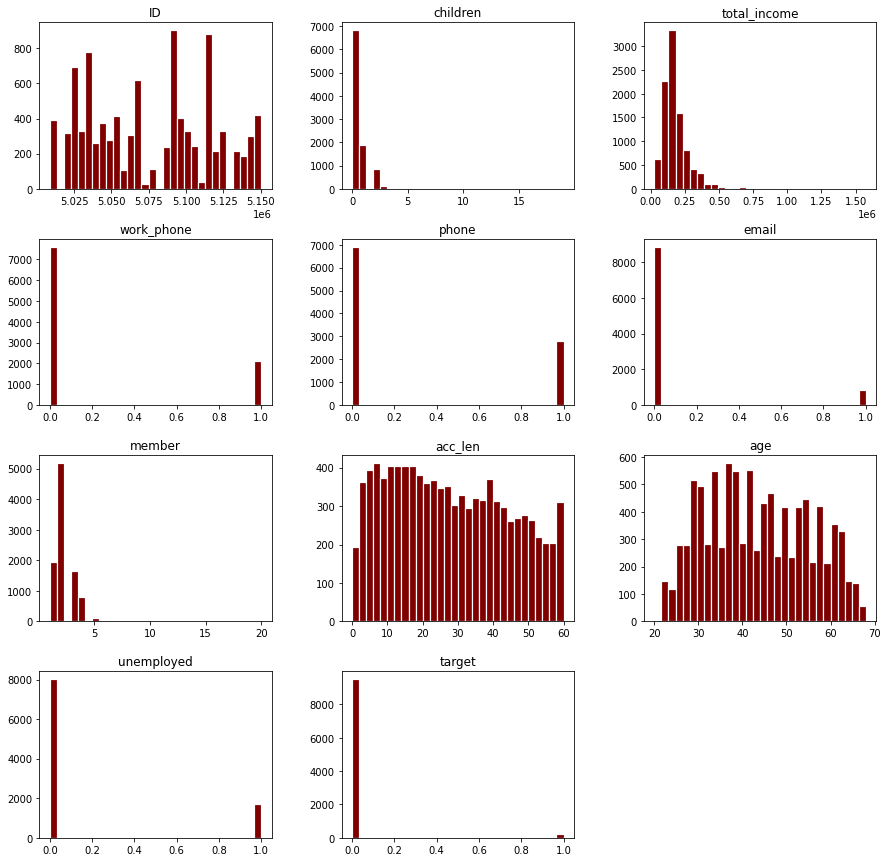

In [32]:
final_df.hist(bins = 30, figsize= (15,15), color='Maroon', edgecolor='white', linewidth=1.2, grid=False)
plt.show()

###Gender

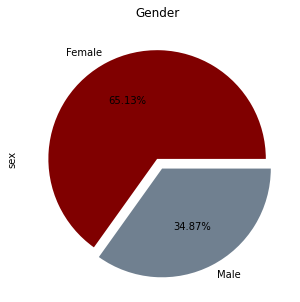

In [33]:
plt.figure(figsize = (5,5))
colors = ['Maroon','SlateGrey']
final_df['sex'].value_counts().plot.pie(labels=['Female', 'Male'], autopct='%1.2f%%', colors=colors, explode=[0,0.1])
plt.title('Gender')
plt.show()

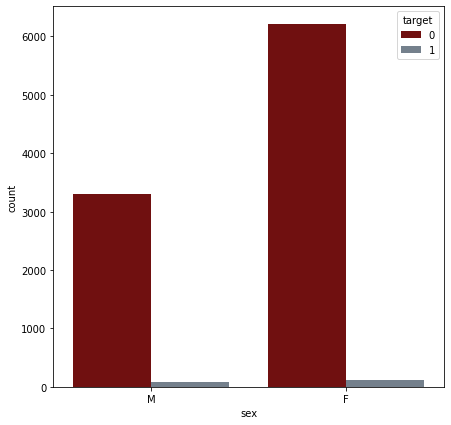

In [34]:
plt.figure(figsize=(7, 7))
sns.countplot(data=final_df, x='sex', hue='target', palette=colors)
plt.show()

### Car

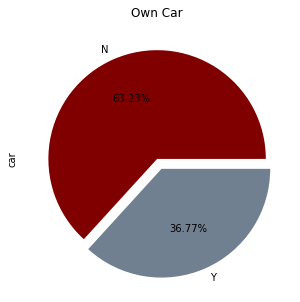

In [35]:
plt.figure(figsize = (5,5))
final_df['car'].value_counts().plot.pie(autopct='%1.2f%%', colors=colors, explode=[0,0.1])
plt.title('Own Car')
plt.show()

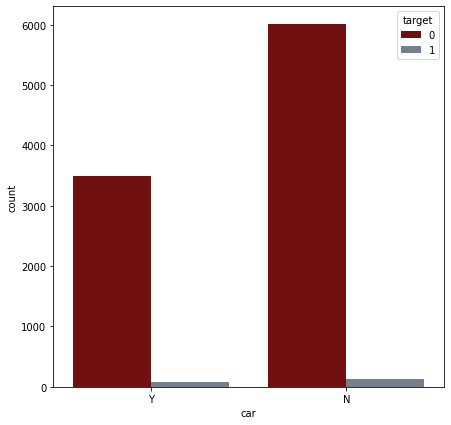

In [36]:
plt.figure(figsize=(7, 7))
sns.countplot(data=final_df, x='car', hue='target', palette=colors)
plt.show()

###Property

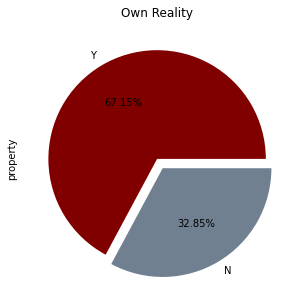

In [37]:
plt.figure(figsize = (5,5))
final_df['property'].value_counts().plot.pie( autopct='%1.2f%%', colors=colors, explode=[0,0.1])
plt.title('Own Reality')
plt.show()

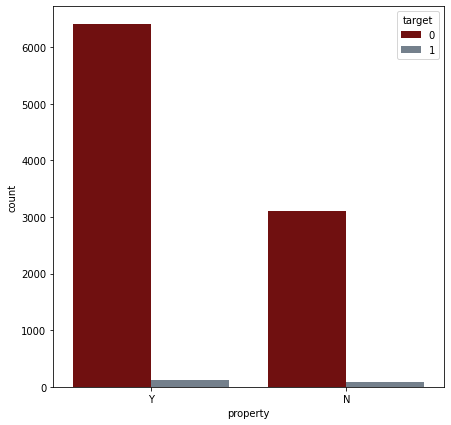

In [38]:
plt.figure(figsize=(7, 7))
sns.countplot(data=final_df, x='property', hue='target', palette=colors)
plt.show()

### Number of children

In [39]:
final_df['children'].value_counts()

0     6819
1     1886
2      852
3      126
4       18
5        5
14       1
19       1
7        1
Name: children, dtype: int64

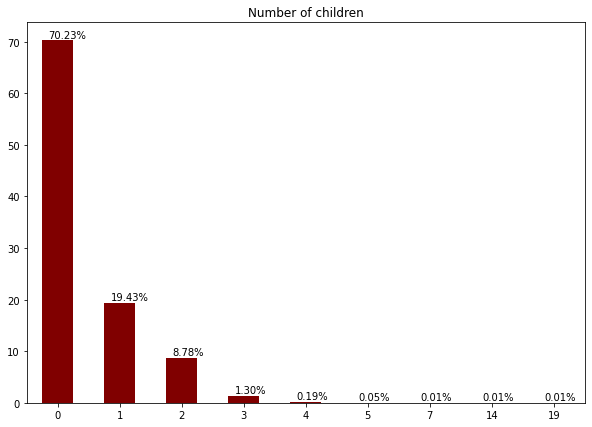

In [40]:
plt.figure(figsize=(10,7))
ax = (final_df['children'].value_counts()/len(final_df)*100).sort_index().plot(kind='bar', rot=0, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Number of children')
plt.show()

###Total Income

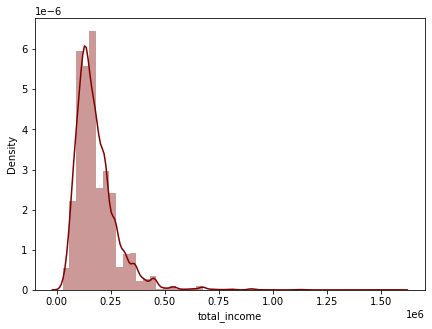

In [41]:
plt.figure(figsize=(7,5))
sns.distplot(final_df['total_income'], color='maroon')
plt.show()

###Income type

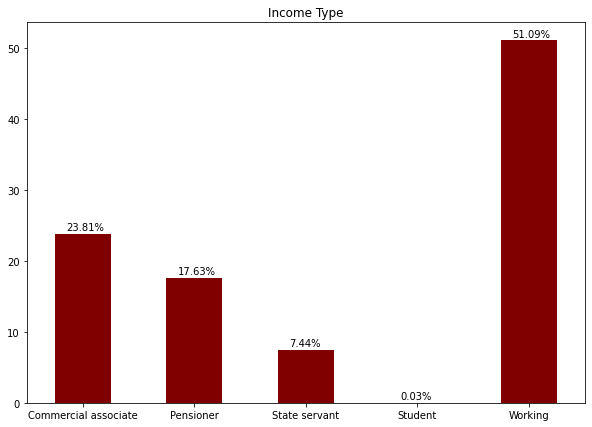

In [42]:
plt.figure(figsize=(10,7))
ax = (final_df['income_type'].value_counts()/len(final_df)*100).sort_index().plot(kind='bar', rot=0, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Income Type')
plt.show()

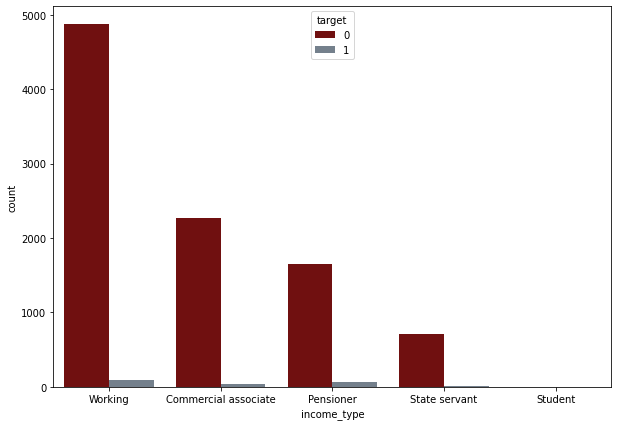

In [43]:
plt.figure(figsize=(10, 7))
sns.countplot(data=final_df, x='income_type', hue='target', palette=colors)
plt.show()

###Education Type

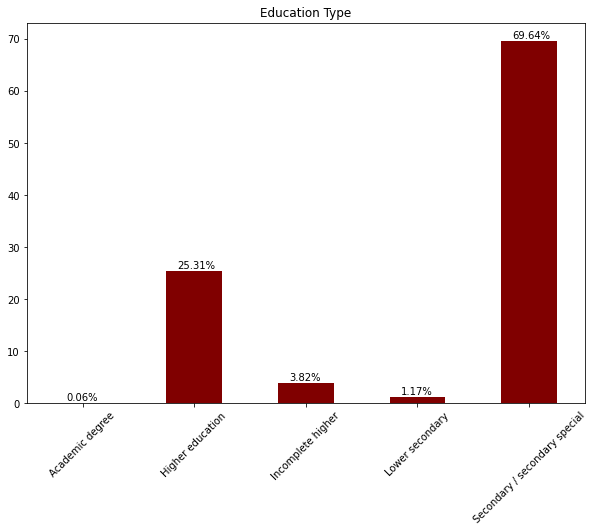

In [44]:
plt.figure(figsize=(10,7))
ax = (final_df['edu_type'].value_counts()/len(final_df)*100).sort_index().plot(kind='bar', rot=45, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Education Type')
plt.show()

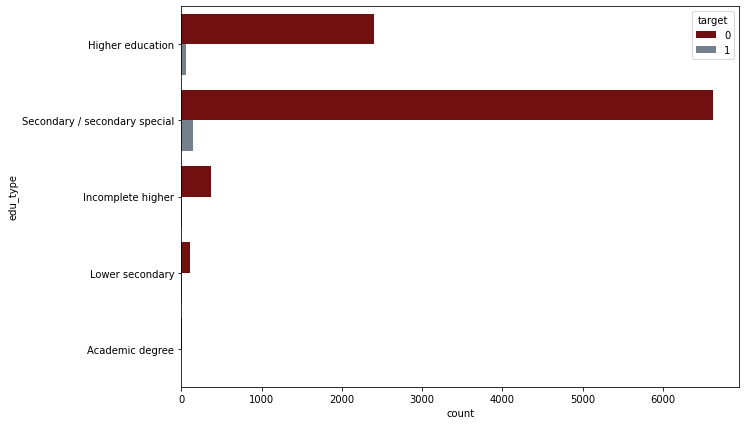

In [45]:
plt.figure(figsize=(10, 7))
sns.countplot(data=final_df, y='edu_type', hue='target', palette=colors)
plt.show()

###Family status

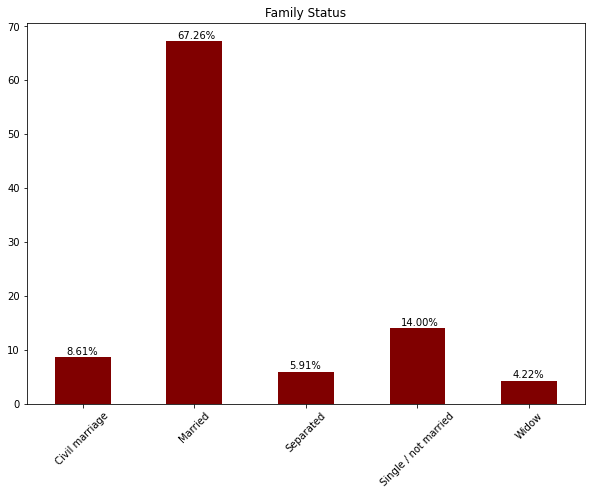

In [46]:
plt.figure(figsize=(10,7))
ax = (final_df['fam_stt'].value_counts()/len(final_df)*100).sort_index().plot(kind='bar', rot=45, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Family Status')
plt.show()

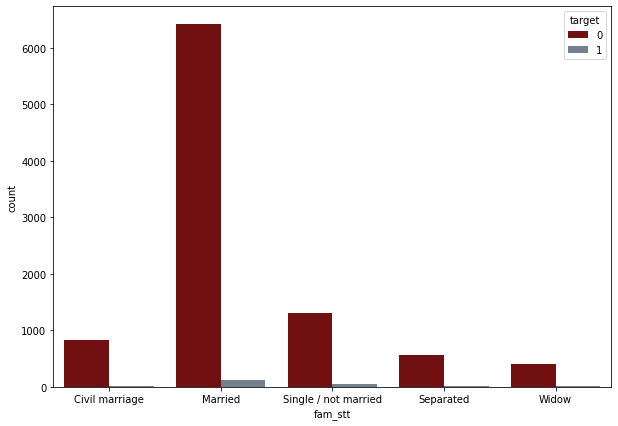

In [47]:
plt.figure(figsize=(10, 7))
sns.countplot(data=final_df, x='fam_stt', hue='target', palette=colors)
plt.show()

###Housing Type

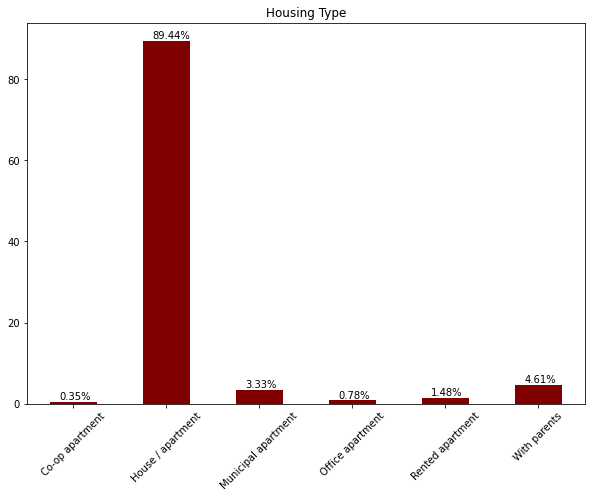

In [48]:
plt.figure(figsize=(10,7))
ax = (final_df['house_type'].value_counts()/len(final_df)*100).sort_index().plot(kind='bar', rot=45, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Housing Type')
plt.show()

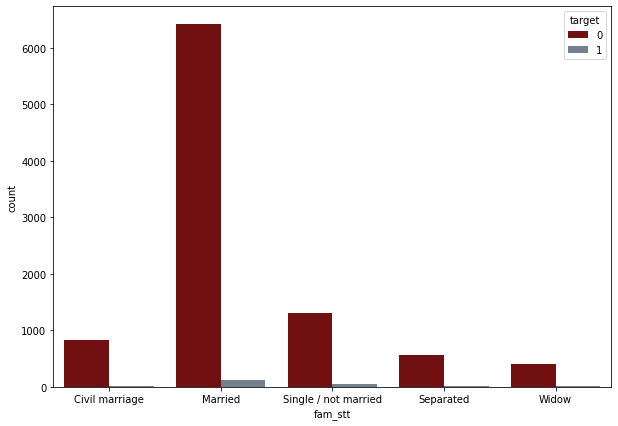

In [49]:
plt.figure(figsize=(10, 7))
sns.countplot(data=final_df, x='fam_stt', hue='target', palette=colors)
plt.show()

###Work Phone

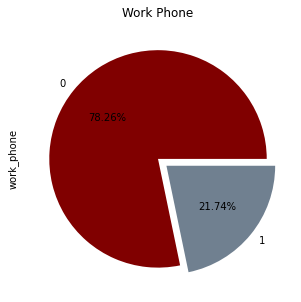

In [50]:
plt.figure(figsize = (5,5))
final_df['work_phone'].value_counts().plot.pie(autopct='%1.2f%%', colors=colors, explode=[0,0.1])
plt.title('Work Phone')
plt.show()

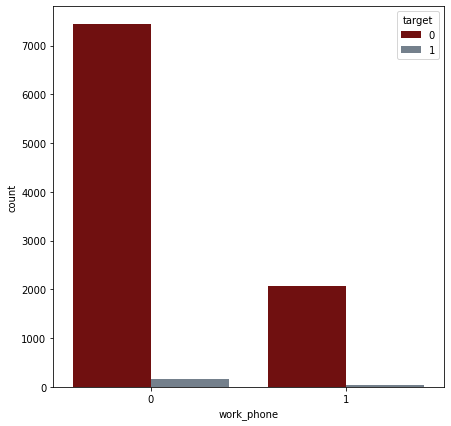

In [51]:
plt.figure(figsize=(7, 7))
sns.countplot(data=final_df, x='work_phone', hue='target', palette=colors)
plt.show()

###Phone

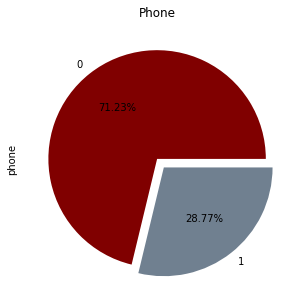

In [52]:
plt.figure(figsize = (5,5))
final_df['phone'].value_counts().plot.pie(autopct='%1.2f%%', colors=colors, explode=[0,0.1])
plt.title('Phone')
plt.show()

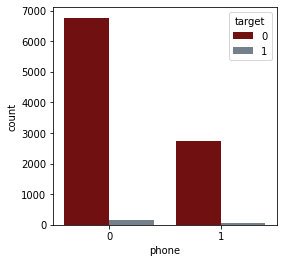

In [53]:
plt.figure(figsize=(4, 4))
sns.countplot(data=final_df, x='phone', hue='target', palette=colors)
plt.show()

###Email

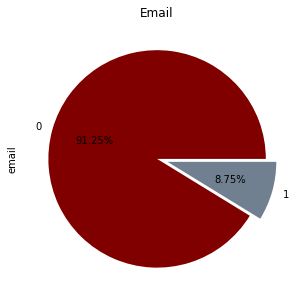

In [54]:
plt.figure(figsize = (5,5))
final_df['email'].value_counts().plot.pie(autopct='%1.2f%%', colors=colors, explode=[0,0.1])
plt.title('Email')
plt.show()

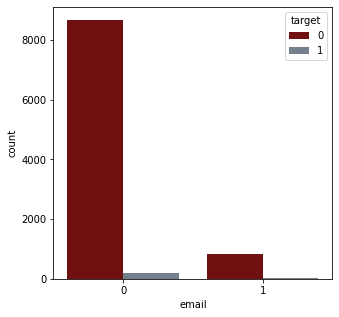

In [55]:
plt.figure(figsize=(5, 5))
sns.countplot(data=final_df, x='email', hue='target', palette=colors)
plt.show()

###Occupation Type

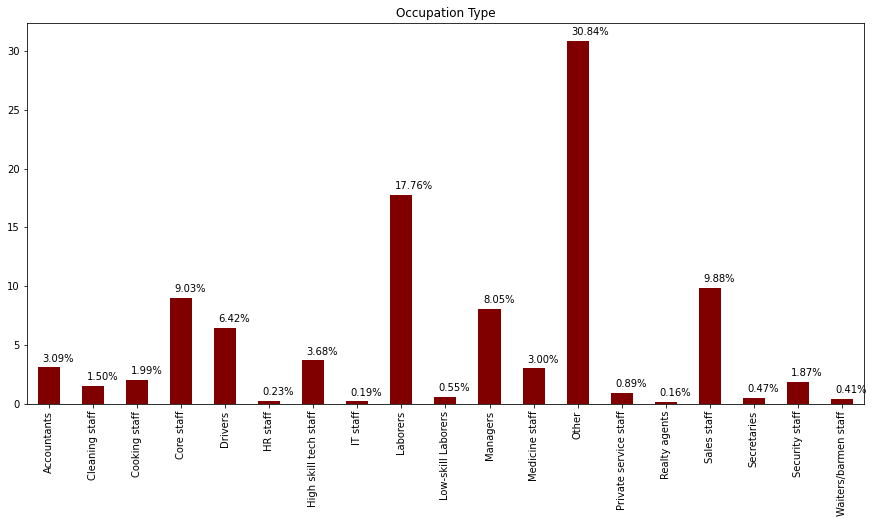

In [56]:
plt.figure(figsize=(15,7))
ax = (final_df['job'].value_counts()/len(final_df)*100).sort_index().plot(kind='bar', rot=90, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Occupation Type')
plt.show()

###Family Member

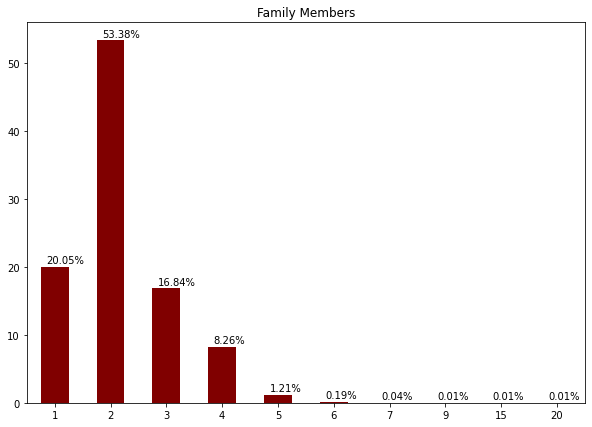

In [57]:
plt.figure(figsize=(10,7))
ax = (final_df['member'].value_counts()/len(final_df)*100).sort_index().plot(kind='bar', rot=0, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Family Members')
plt.show()

### Account length

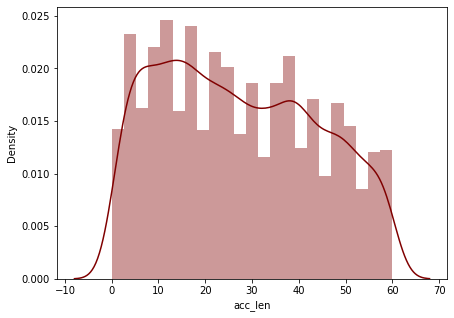

In [58]:
plt.figure(figsize=(7,5))
sns.distplot(final_df['acc_len'], color='maroon')
plt.show()

###Age Year

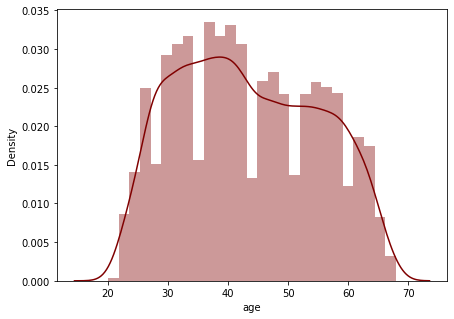

In [59]:
plt.figure(figsize=(7,5))
sns.distplot(final_df['age'], color='maroon')
plt.show()

###Unemployed

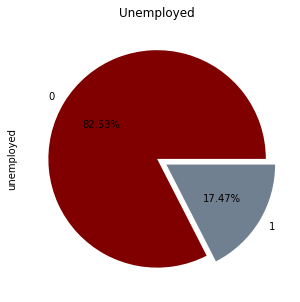

In [60]:
plt.figure(figsize = (5,5))
final_df['unemployed'].value_counts().plot.pie(autopct='%1.2f%%', colors=colors, explode=[0,0.1])
plt.title('Unemployed')
plt.show()

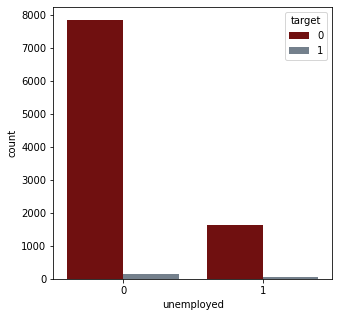

In [61]:
plt.figure(figsize=(5, 5))
sns.countplot(data=final_df, x='unemployed', hue='target', palette=colors)
plt.show()

###Target

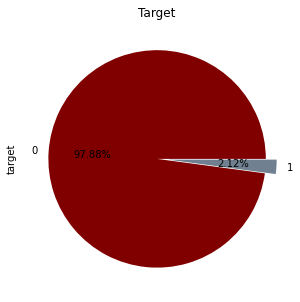

In [62]:
plt.figure(figsize = (5,5))
final_df['target'].value_counts().plot.pie(autopct='%1.2f%%', colors=colors, explode=[0,0.1])
plt.title('Target')
plt.show()

##Outliers

In [63]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,9709.0,5.076105e+06,40802.696053,5008804.0,5036955.0,5069449.0,5112986.0,5150479.0
children,9709.0,4.228036e-01,0.767019,0.0,0.0,0.0,1.0,19.0
total_income,9709.0,1.812282e+05,99277.305097,27000.0,112500.0,157500.0,225000.0,1575000.0
work_phone,9709.0,2.174271e-01,0.412517,0.0,0.0,0.0,0.0,1.0
phone,9709.0,2.876712e-01,0.452700,0.0,0.0,0.0,1.0,1.0
email,9709.0,8.754764e-02,0.282650,0.0,0.0,0.0,0.0,1.0
member,9709.0,2.182614e+00,0.932918,1.0,2.0,2.0,3.0,20.0
acc_len,9709.0,2.727006e+01,16.648057,0.0,13.0,26.0,41.0,60.0
age,9709.0,4.330920e+01,11.635746,20.0,34.0,42.0,53.0,68.0
unemployed,9709.0,1.746833e-01,0.379716,0.0,0.0,0.0,0.0,1.0


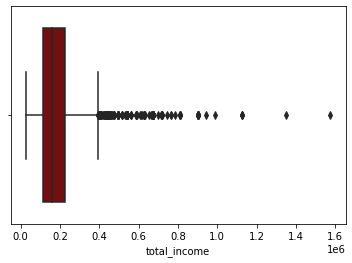

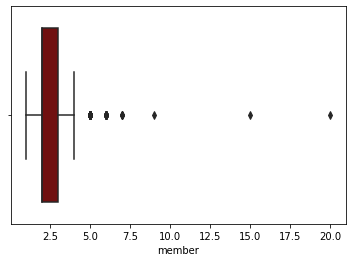

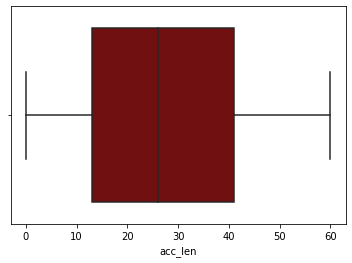

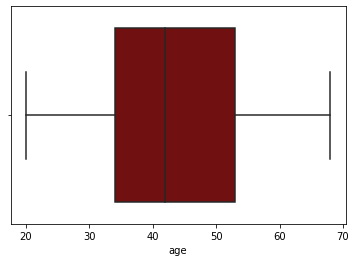

In [64]:
cols = ['total_income','member','acc_len','age']
for col in cols:
  sns.boxplot(data=final_df, x=col, color='maroon')
  plt.show()

In [65]:
def remove_outlier(df, col_name):
  Q1 = df[col_name].quantile(0.25)
  Q3 = df[col_name].quantile(0.75)
  IQR = Q3 - Q1
  fence_low = Q1 - 1.5*IQR
  fence_high = Q3 + 1.5*IQR
  df = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df 

In [66]:
col_name = ['total_income','member']
for col in col_name:
  final_df = remove_outlier(final_df, col)

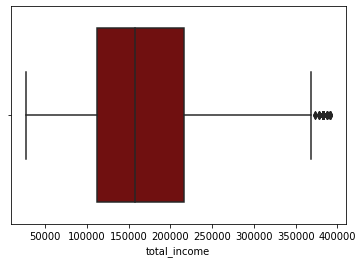

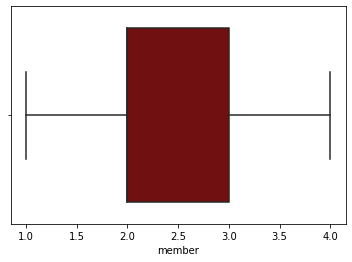

In [67]:
for col in col_name:
  sns.boxplot(data=final_df, x=col, color='maroon')
  plt.show()

In [68]:
final_df.shape

(9257, 19)

##Feature engineering

In [69]:
final_df['sex'] = final_df['sex'].apply(lambda x: 0 if x == 'M' else 1)
final_df['car'] = final_df['car'].apply(lambda x: 0 if x == 'N' else 1)
final_df['property'] = final_df['property'].apply(lambda x: 0 if x == 'N' else 1)
final_df['children'] = final_df['children'].apply(lambda x : '2+' if x>= 2 else str(x))

In [70]:
final_df.nunique()

ID              9257
sex                2
car                2
property           2
children           3
total_income     217
income_type        5
edu_type           5
fam_stt            5
house_type         6
work_phone         2
phone              2
email              2
job               19
member             4
acc_len           61
age               49
unemployed         2
target             2
dtype: int64

In [71]:
def get_category(df, col, binsnum, labels, qcut = False):
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels) # equal-length cut
        
    localdf = pd.DataFrame(localdf)
    name =  col + '_' + 'group'
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df

In [72]:
final_df = get_category(final_df,'total_income', 7, ['lowest','low2','low1', 'medium',\
                                                     'high1','high2','highest'], qcut = True) #qcut

In [73]:
final_df = get_category(final_df,'acc_len', 10, ['6 month','12 month','18 month','24 month',\
                                                 '30 month','36 month','42 month','48 month',\
                                                 '54 month','60 month']) #cut

In [74]:
final_df = get_category(final_df,'age',7, ['lowest','low2', 'low1','medium','high1','high2','highest'])

In [75]:
final_df

,ID,sex,car,property,children,total_income,income_type,edu_type,fam_stt,house_type,...,email,job,member,acc_len,age,unemployed,target,total_income_group,acc_len_group,age_group
1,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2,29,58,0,0,low2,30 month,high2
2,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1,4,52,0,0,highest,6 month,high1
3,5008812,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,Other,1,20,61,1,0,highest,24 month,high2
4,5008815,0,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,Accountants,2,5,46,0,0,highest,6 month,medium
5,5008819,0,1,1,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,Laborers,2,17,48,0,0,low1,18 month,high1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,1,0,0,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,...,0,Laborers,2,20,56,0,1,high1,24 month,high2
9705,5149055,1,0,1,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,Other,2,19,43,0,1,low2,24 month,medium
9706,5149729,0,1,1,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Other,2,21,52,0,1,lowest,24 month,high1
9707,5149838,1,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,1,Medicine staff,2,32,33,0,1,medium,36 month,low2


##WOE, IV

In [76]:
ivtable = pd.DataFrame(final_df.columns, columns = ['variable'])
ivtable['IV'] = None
ivtable.set_index(['variable'],inplace = True)
ivtable.drop(['ID','target', 'total_income_group', 'acc_len_group', 'age_group'],inplace = True)
ivtable

,IV
variable,
sex,None
car,None
property,None
children,None
total_income,None
income_type,None
edu_type,None
fam_stt,None
house_type,None


In [77]:
def calculate_iv(df, feature, columns):
    lst = []
    df[feature] = df[feature].fillna('NULL')

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[columns] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[columns] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'Total', 'Good', 'Bad'])
    data['Bad Rate'] = data['Bad'] / data['Total']
    data['Distribution Good'] = data['Good'] / data['Good'].sum()
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    iv = data['IV'].sum()
    print('This variable\'s IV is:',iv)
    return iv, data

###Gender

In [78]:
iv, data = calculate_iv(final_df,'sex','target')
ivtable.loc['sex'] = iv
data.head()

This variable's IV is: 0.024623262261920378


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,sex,0,3168,3088,80,0.025253,0.340651,0.416667,-0.201428,0.015312
1,sex,1,6089,5977,112,0.018394,0.659349,0.583333,0.122494,0.009312


In [79]:
final_df.groupby('target')['sex'].value_counts()

target  sex
0       1      5977
        0      3088
1       1       112
        0        80
Name: sex, dtype: int64

###Car

In [80]:
iv, data = calculate_iv(final_df,'car','target')
ivtable.loc['car'] =iv
data.head()

This variable's IV is: 0.0008339270112580716


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,car,0,5950,5824,126,0.021176,0.642471,0.65625,-0.021220,0.000292
1,car,1,3307,3241,66,0.019958,0.357529,0.34375,0.039302,0.000542


###Reality

In [81]:
iv, data = calculate_iv(final_df,'property','target')
ivtable.loc['property'] = iv
data.head()

This variable's IV is: 0.03833279896700813


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,property,0,3048,2967,81,0.026575,0.327303,0.421875,-0.253823,0.024005
1,property,1,6209,6098,111,0.017877,0.672697,0.578125,0.151505,0.014328


###Children

In [82]:
iv, data = calculate_iv(final_df,'children','target')
ivtable.loc['children'] = iv
data.head()

This variable's IV is: 0.001034695486297249


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,children,0,6618,6482,136,0.020550,0.715058,0.708333,0.009449,0.000064
1,children,1,1808,1771,37,0.020465,0.195367,0.192708,0.013701,0.000036
2,children,2+,831,812,19,0.022864,0.089575,0.098958,-0.099619,0.000935


###Total Income

In [83]:
iv, data = calculate_iv(final_df,'total_income_group','target')
ivtable.loc['total_income'] = iv
data.head()

This variable's IV is: 0.02386373303034832


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,total_income_group,high1,1527,1493,34,0.022266,0.164699,0.177083,-0.072498,0.000898
1,total_income_group,high2,1153,1134,19,0.016479,0.125097,0.098958,0.234387,0.006126
2,total_income_group,highest,1277,1251,26,0.020360,0.138003,0.135417,0.018921,0.000049
3,total_income_group,low1,1304,1273,31,0.023773,0.140430,0.161458,-0.139536,0.002934
4,total_income_group,low2,1363,1336,27,0.019809,0.147380,0.140625,0.046918,0.000317


###Income Type

In [84]:
iv, data = calculate_iv(final_df,'income_type','target')
ivtable.loc['income_type'] = iv
data.head()

This variable's IV is: 0.1348400316745104


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,income_type,Commercial associate,2145,2115,30,0.013986,0.233315,0.156250,0.400932,0.030898
1,income_type,Pensioner,1680,1617,63,0.037500,0.178378,0.328125,-0.609488,0.091269
2,income_type,State servant,676,666,10,0.014793,0.073469,0.052083,0.344024,0.007357
3,income_type,Student,3,3,0,0.000000,0.000331,0.000000,0.000000,0.000000
4,income_type,Working,4753,4664,89,0.018725,0.514506,0.463542,0.104312,0.005316


###Education Type

In [85]:
iv, data = calculate_iv(final_df,'edu_type','target')
ivtable.loc['edu_type'] = iv
data.head()

This variable's IV is: 0.011876507196641828


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,edu_type,Academic degree,5,5,0,0.000000,0.000552,0.000000,0.000000,0.000000
1,edu_type,Higher education,2247,2199,48,0.021362,0.242581,0.250000,-0.030124,0.000223
2,edu_type,Incomplete higher,351,344,7,0.019943,0.037948,0.036458,0.040051,0.000060
3,edu_type,Lower secondary,113,108,5,0.044248,0.011914,0.026042,-0.781987,0.011048
4,edu_type,Secondary / secondary special,6541,6409,132,0.020180,0.707005,0.687500,0.027976,0.000546


###Family Status

In [86]:
iv, data = calculate_iv(final_df,'fam_stt','target')
ivtable.loc['fam_stt'] = iv
data.head()

This variable's IV is: 0.1161929976280486


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,fam_stt,Civil marriage,810,798,12,0.014815,0.088031,0.062500,0.342521,0.008745
1,fam_stt,Married,6171,6066,105,0.017015,0.669167,0.546875,0.201814,0.024680
2,fam_stt,Separated,551,538,13,0.023593,0.059349,0.067708,-0.131772,0.001102
3,fam_stt,Single / not married,1319,1269,50,0.037908,0.139989,0.260417,-0.620719,0.074752
4,fam_stt,Widow,406,394,12,0.029557,0.043464,0.062500,-0.363236,0.006915


###Housing Type

In [87]:
iv, data = calculate_iv(final_df,'house_type','target')
ivtable.loc['house_type'] = iv
data.head()

This variable's IV is: 0.03436540352982442


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,house_type,Co-op apartment,31,31,0,0.000000,0.003420,0.000000,0.000000,0.000000
1,house_type,House / apartment,8276,8110,166,0.020058,0.894650,0.864583,0.034185,0.001028
2,house_type,Municipal apartment,312,298,14,0.044872,0.032874,0.072917,-0.796645,0.031900
3,house_type,Office apartment,69,68,1,0.014493,0.007501,0.005208,0.364827,0.000837
4,house_type,Rented apartment,138,135,3,0.021739,0.014892,0.015625,-0.048018,0.000035


###Work Phone

In [88]:
iv, data = calculate_iv(final_df,'work_phone','target')
ivtable.loc['work_phone'] =iv
data.head()

This variable's IV is: 0.0036226780616786013


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,work_phone,0,7253,7098,155,0.021370,0.783012,0.807292,-0.030538,0.000741
1,work_phone,1,2004,1967,37,0.018463,0.216988,0.192708,0.118666,0.002881


###Phone

In [89]:
iv, data = calculate_iv(final_df,'phone','target')
ivtable.loc['phone'] =iv
data.head()

This variable's IV is: 0.00021319793361140746


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,phone,0,6617,6481,136,0.020553,0.714948,0.708333,0.009294,0.000061
1,phone,1,2640,2584,56,0.021212,0.285052,0.291667,-0.022939,0.000152


###Email

In [90]:
iv, data = calculate_iv(final_df,'email','target')
ivtable.loc['email'] =iv
data.head()

This variable's IV is: 0.017968949920975596


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,email,0,8470,8288,182,0.021488,0.914286,0.947917,-0.036123,0.001215
1,email,1,787,777,10,0.012706,0.085714,0.052083,0.498175,0.016754


###Occupation Type

In [91]:
iv, data = calculate_iv(final_df,'job','target')
ivtable.loc['job'] = iv
data.head()

This variable's IV is: 0.09316267854122334


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,job,Accountants,284,278,6,0.021127,0.030667,0.031250,-0.018819,0.000011
1,job,Cleaning staff,142,139,3,0.021127,0.015334,0.015625,-0.018819,0.000005
2,job,Cooking staff,190,186,4,0.021053,0.020518,0.020833,-0.015228,0.000005
3,job,Core staff,816,796,20,0.024510,0.087810,0.104167,-0.170814,0.002794
4,job,Drivers,598,582,16,0.026756,0.064203,0.083333,-0.260799,0.004989


###Family Member

In [92]:
iv, data = calculate_iv(final_df,'member','target')
ivtable.loc['member'] =iv
data.head()

This variable's IV is: 0.00853316389271462


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,member,1,1895,1849,46,0.024274,0.203971,0.239583,-0.160922,0.005731
1,member,2,5025,4923,102,0.020299,0.543078,0.531250,0.022020,0.000260
2,member,3,1563,1533,30,0.019194,0.169112,0.156250,0.079104,0.001017
3,member,4,774,760,14,0.018088,0.083839,0.072917,0.139580,0.001525


###Account Length

In [93]:
iv, data = calculate_iv(final_df,'acc_len_group','target')
ivtable.loc['acc_len'] =iv
data.head()

This variable's IV is: 0.33762513498703517


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,acc_len_group,12 month,1137,1121,16,0.014072,0.123662,0.083333,0.394707,0.015918
1,acc_len_group,18 month,1165,1143,22,0.018884,0.126089,0.114583,0.095688,0.001101
2,acc_len_group,24 month,1025,1014,11,0.010732,0.111859,0.057292,0.669082,0.036510
3,acc_len_group,30 month,923,906,17,0.018418,0.099945,0.088542,0.121145,0.001381
4,acc_len_group,36 month,897,882,15,0.016722,0.097297,0.078125,0.219461,0.004208


###Age

In [94]:
iv, data = calculate_iv(final_df,'age_group','target')
ivtable.loc['age'] = iv
data.head()

This variable's IV is: 0.046388321700657355


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,age_group,high1,1479,1445,34,0.022989,0.159404,0.177083,-0.105177,0.001859
1,age_group,high2,1371,1332,39,0.028446,0.146939,0.203125,-0.323806,0.018193
2,age_group,highest,664,648,16,0.024096,0.071484,0.083333,-0.153379,0.001817
3,age_group,low1,1812,1777,35,0.019316,0.196029,0.182292,0.072653,0.000998
4,age_group,low2,1776,1743,33,0.018581,0.192278,0.171875,0.112175,0.002289


###Unemployed

In [95]:
iv, data = calculate_iv(final_df,'unemployed','target')
ivtable.loc['unemployed'] =iv
data.head()

This variable's IV is: 0.044534052270516065


,Variable,Value,Total,Good,Bad,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,unemployed,0,7589,7448,141,0.018580,0.821622,0.734375,0.112260,0.009794
1,unemployed,1,1668,1617,51,0.030576,0.178378,0.265625,-0.398179,0.034740


### IV table

In [96]:
ivtable = ivtable.sort_values(by='IV',ascending=False)
ivtable 

,IV
variable,
acc_len,0.337625
income_type,0.13484
fam_stt,0.116193
job,0.093163
age,0.046388
unemployed,0.044534
property,0.038333
house_type,0.034365
sex,0.024623


##Feature Selection

In [97]:
final_df.drop(['email','edu_type','member', 'work_phone', 'children', 'car', 'phone'], axis =1, inplace=True)

In [98]:
final_df['job'].unique()

array(['Security staff', 'Sales staff', 'Other', 'Accountants',
       'Laborers', 'Drivers', 'Core staff', 'Managers',
       'High skill tech staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Low-skill Laborers', 'Medicine staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents',
       'IT staff'], dtype=object)

In [99]:
job_type = {'Other': 'Other',
            'Security staff': 'Labor worker',
            'Sales staff': 'Office worker',
            'Accountants': 'Office worker',
            'Laborers': 'Labor worker',
            'Drivers': 'Labor worker',
            'Core staff': 'Office worker',
            'Managers': 'Hightech worker',
            'High skill tech staff': 'Hightech worker',
            'Cleaning staff': 'Labor worker',
            'Private service staff': 'Office worker',
            'Cooking staff': 'Labor worker',
            'Low-skill Laborers': 'Labor worker',
            'Medicine staff': 'Office worker',
            'Secretaries': 'Office worker',
            'Waiters/barmen staff': 'Labor worker',
            'HR staff': 'Office worker',
            'Realty agents': 'Office worker',
            'IT staff': 'Hightech worker',
            }

final_df['job'] = final_df['job'].map(job_type)

In [100]:
family_status = {'Single / not married':'Single',
                 'Separated':'Single',
                 'Widow':'Single',
                 'Civil marriage':'Married',
                 'Married':'Married'}
    
final_df['fam_stt'] = final_df['fam_stt'].map(family_status)

In [101]:
housing_type = {'House / apartment' : 'House / apartment',
                'With parents': 'With parents',
                'Municipal apartment' : 'House / apartment',
                'Rented apartment': 'House / apartment',
                'Office apartment': 'House / apartment',
                'Co-op apartment': 'House / apartment'}

final_df['house_type'] = final_df['house_type'].map(housing_type)

In [102]:
final_df

,ID,sex,property,total_income,income_type,fam_stt,house_type,job,acc_len,age,unemployed,target,total_income_group,acc_len_group,age_group
1,5008806,0,1,112500.0,Working,Married,House / apartment,Labor worker,29,58,0,0,low2,30 month,high2
2,5008808,1,1,270000.0,Commercial associate,Single,House / apartment,Office worker,4,52,0,0,highest,6 month,high1
3,5008812,1,1,283500.0,Pensioner,Single,House / apartment,Other,20,61,1,0,highest,24 month,high2
4,5008815,0,1,270000.0,Working,Married,House / apartment,Office worker,5,46,0,0,highest,6 month,medium
5,5008819,0,1,135000.0,Commercial associate,Married,House / apartment,Labor worker,17,48,0,0,low1,18 month,high1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,1,0,180000.0,Pensioner,Married,House / apartment,Labor worker,20,56,0,1,high1,24 month,high2
9705,5149055,1,1,112500.0,Commercial associate,Married,House / apartment,Other,19,43,0,1,low2,24 month,medium
9706,5149729,0,1,90000.0,Working,Married,House / apartment,Other,21,52,0,1,lowest,24 month,high1
9707,5149838,1,1,157500.0,Pensioner,Married,House / apartment,Office worker,32,33,0,1,medium,36 month,low2


In [103]:
final_df.drop(['total_income','acc_len','age'], axis =1, inplace=True)

In [104]:
def convert_dummy(df, columns):
  data = pd.get_dummies(df[columns], drop_first=True)
  dt = pd.concat([df, data], axis=1)
  dt.drop(columns, axis = 1, inplace = True) 
  return dt

In [105]:
'''columns = ['income_type','edu_type','fam_stt','house_type','children',\
           'job','total_income_group','acc_len_group','age_group']
final_df = convert_dummy(final_df, columns)
final_df'''

"columns = ['income_type','edu_type','fam_stt','house_type','children',           'job','total_income_group','acc_len_group','age_group']\nfinal_df = convert_dummy(final_df, columns)\nfinal_df"

In [106]:
columns = ['income_type','fam_stt','house_type','job','total_income_group','acc_len_group','age_group']
final_df = convert_dummy(final_df, columns)
final_df

,ID,sex,property,unemployed,target,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,fam_stt_Single,...,acc_len_group_48 month,acc_len_group_54 month,acc_len_group_6 month,acc_len_group_60 month,age_group_high2,age_group_highest,age_group_low1,age_group_low2,age_group_lowest,age_group_medium
1,5008806,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,5008808,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,5008812,1,1,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5008815,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
5,5008819,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9705,5149055,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9706,5149729,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9707,5149838,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#Model

In [107]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTEN
import itertools
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,plot_confusion_matrix,plot_roc_curve,roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [108]:
X = final_df.drop(columns = 'target')
y = final_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

In [110]:
#oversampling
X_train, y_train = SMOTEN().fit_resample(X_train, y_train)
X_test, y_test = SMOTEN().fit_resample(X_test, y_test)

##Logistic Regression

In [111]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train )

print('Logistic Model Accuracy : ', log_model.score(X_test , y_test))

y_pred_log = log_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test , y_pred_log))
      
print('\nClassification report:')      
print(classification_report(y_test, y_pred_log))

Logistic Model Accuracy :  0.9509641873278237

Confusion matrix :
[[1719   96]
 [  82 1733]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1815
           1       0.95      0.95      0.95      1815

    accuracy                           0.95      3630
   macro avg       0.95      0.95      0.95      3630
weighted avg       0.95      0.95      0.95      3630



##Decision Tree classification

In [112]:
decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(X_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(X_test, y_test))

y_pred_des = decision_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, y_pred_des))
      
print('\nClassification report:')      
print(classification_report(y_test, y_pred_des))

Decision Tree Model Accuracy :  0.6685950413223141

Confusion matrix :
[[1738   77]
 [1126  689]]

Classification report:
              precision    recall  f1-score   support

           0       0.61      0.96      0.74      1815
           1       0.90      0.38      0.53      1815

    accuracy                           0.67      3630
   macro avg       0.75      0.67      0.64      3630
weighted avg       0.75      0.67      0.64      3630



## Random Forest Classification

In [113]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(X_train, y_train)

print('Random Forest Model Accuracy : ', RandomForest_model.score(X_test, y_test))

y_pred_rf = RandomForest_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, y_pred_rf))
      
print('\nClassification report:')      
print(classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy :  0.8044077134986226

Confusion matrix :
[[1763   52]
 [ 658 1157]]

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.97      0.83      1815
           1       0.96      0.64      0.77      1815

    accuracy                           0.80      3630
   macro avg       0.84      0.80      0.80      3630
weighted avg       0.84      0.80      0.80      3630



##XGBoost  classification

In [114]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(X_train, y_train)

print('XGBoost Model Accuracy : ', XGB_model.score(X_test, y_test))

y_pred_xgb = XGB_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, y_pred_xgb))
      
print('\nClassification report:')      
print(classification_report(y_test, y_pred_xgb))

XGBoost Model Accuracy :  0.9347107438016529

Confusion matrix :
[[1756   59]
 [ 178 1637]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1815
           1       0.97      0.90      0.93      1815

    accuracy                           0.93      3630
   macro avg       0.94      0.93      0.93      3630
weighted avg       0.94      0.93      0.93      3630



#Evaluation

                                                      fpr  \
models                                                      
LR      [0.0, 0.0, 0.0, 0.0, 0.0, 0.000550964187327823...   
DT      [0.0, 0.007713498622589532, 0.0082644628099173...   
RF      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
XGB     [0.0, 0.0, 0.0, 0.0, 0.0011019283746556473, 0....   

                                                      tpr       auc  
models                                                               
LR      [0.0, 0.032506887052341595, 0.0584022038567493...  0.970601  
DT      [0.0, 0.0011019283746556473, 0.001101928374655...  0.619826  
RF      [0.0, 0.025895316804407712, 0.0473829201101928...  0.962554  
XGB     [0.0, 0.025895316804407712, 0.0743801652892562...  0.967869  


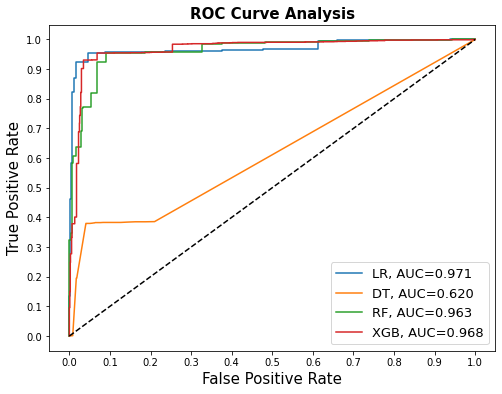

In [115]:
y_pred_prob_test_log = log_model.predict_proba(X_test)[:, 1]
y_pred_prob_test_des = decision_model.predict_proba(X_test)[:, 1]
y_pred_prob_test_rf = RandomForest_model.predict_proba(X_test)[:, 1]
y_pred_prob_test_xgb = XGB_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score

results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions = {'LR': y_pred_prob_test_log, 'DT': y_pred_prob_test_des, 'RF': y_pred_prob_test_rf, 'XGB': y_pred_prob_test_xgb}

for key in predictions:
    fpr, tpr, _ = roc_curve(y_test, predictions[key])
    auc = roc_auc_score(y_test, predictions[key])
    
    results_table = results_table.append({'models': key,
                                         'fpr' : fpr,
                                         'tpr' : tpr,
                                         'auc' : auc}, ignore_index=True)
    
results_table.set_index('models', inplace=True)

print(results_table)

fig = plt.figure(figsize = (8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()

#Credit Score

In [116]:
import numpy as np

def _CreditScore(beta, alpha, woe, n = 12, odds = 1/4, pdo = -50, thres_score = 600):
  factor = pdo/np.log(2)
  offset = thres_score - factor*np.log(odds)
  score = (beta*woe+alpha/n)*factor+offset/n
  return score

_CreditScore(beta = 0.5, alpha = -1, woe = 0.15, n = 12)

42.2677896003704

In [117]:
betas_dict = dict(zip(list(X_train.columns), log_model.coef_[0]))
alpha = log_model.intercept_[0]
betas_dict

{'ID': -1.487393257738786,
 'acc_len_group_18 month': -0.5469033418603275,
 'acc_len_group_24 month': -0.81385431627991,
 'acc_len_group_30 month': -0.3225701010934955,
 'acc_len_group_36 month': -0.4288458030549949,
 'acc_len_group_42 month': -0.19353272098666502,
 'acc_len_group_48 month': -0.027397583566822495,
 'acc_len_group_54 month': 0.11013647497064102,
 'acc_len_group_6 month': -0.5574761041275205,
 'acc_len_group_60 month': 0.11781524920784213,
 'age_group_high2': -0.6424600102750305,
 'age_group_highest': -0.6387186123444343,
 'age_group_low1': -0.8473818720426197,
 'age_group_low2': -1.205795953360883,
 'age_group_lowest': -0.5681537613546174,
 'age_group_medium': -1.175228450777509,
 'fam_stt_Single': 0.2706183959309679,
 'house_type_With parents': -0.32712263598996966,
 'income_type_Pensioner': 3.7588022934421463,
 'income_type_State servant': -0.5280693545355511,
 'income_type_Student': -0.019694054051939375,
 'income_type_Working': 0.19874999590311535,
 'job_Labor worke